# Chapter 4: Training Models

What does "training" mean?
- closed form vs GD
- error analysis/debugging models
- neural networks

**Closed form**: directly computes the model parameters for the best fit equation (minimizing the cost function)

**Gradient Descent (GD)**: iteratively tweaks model parameters to minimize the cost function, eventually converging on the best fit model parameters. 

**Linear regression model prediction:**

$\hat{y} = \theta_0 + \sum_1^n \theta_i x_i $

Where: 
  
- $\hat y$ is the predicted value 
- n is the number of features
- $x_i$ is the $i^{th}$ feature
- $\theta$ is the associated model parameter, where $\theta_0$ is the bias

If $\theta$ and $x$ are column vectors then the prediction is: $y = \theta^T \cdot{} x$

The cost function is essentially the error associated with the model parameters $\theta$

$MSE(\theta) = \frac{1}{m}\sum_1^n (\theta^T\cdot x^{(i)} - y^{(i)})^2$

**Closed-form solution**: analytical form of ideal theta parameters is found by rearranging the vector equation for the linear regression model prediction. 

$\hat \theta  = (X^T X)^{-1} X^T y$

[[4.1419667 ]
 [2.92824651]]


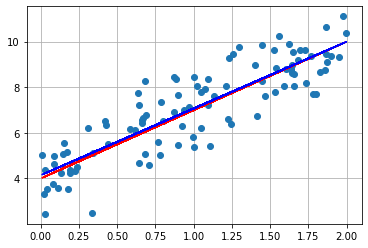

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#Create a line y = 3x + 4 but with some noise
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
y1 = 4+3*X

fig, ax = plt.subplots()
ax.plot(X, y,'o')
ax.plot(X,y1,'r-')
ax.grid()

#Use the normal equation to compute ideal fit parameters 
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

y2 = theta_best[0] + theta_best[1]*X
ax.plot(X,y2,'b-')

We can also do linear regression directly with sklearn!

sklearn uses the pseudoinverse $X^+$ which is always defined even when $X$ is noninvertible

[4.1419667] [[2.92824651]]


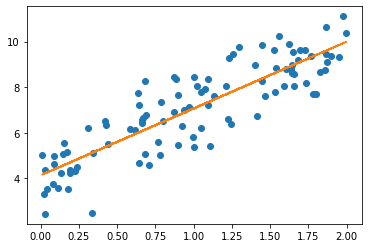

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
y3 = lin_reg.predict(X)
fig, ax = plt.subplots()
ax.plot(X,y,'o')
ax.plot(X,y3,'-')

**Computational Complexity** is a signficant issue when using the normal equation approach. Taking the inverse of a matrix is computationally expensive. By doubling the number of features, it could cost up to $2^2.4 = 5.3$ to $2^3 = 8$ times as much time to compute. 

After training the model (however it is done), computing time for predictions scales linearly with the number of features/instances

**Gradient Descent** is a generic iterative algorithm that computes, compares, then updates until convergence. 

The hyperparameter used is the learning rate, which determines how much the parameters will update after the comparison step. If the learning rate is too small, it will take forever to converge. If it is too large, the solution might diverge. 

GD risks convergence to a local minimum instead of a global minimum. However, if we use MSE as the cost function (since it is convex in nature) it has no local minima, just one global minimum. 

GD is very sensitive to scale, so when using this algorithm it is imperative to preprocess with feature scaling!!

**Batch Gradient Descent**:  To implement GD in reality, the algorithm needs to be computed for each value of $\theta$. This will give us the true gradient as the combination of the partial derivatives of each dimension ($\theta$). 

$\frac{\partial}{\partial \theta}MSE(\theta) = \frac{2}{m} \sum_1^m (\theta^T x^{(i)} - y^{(i)})x^{(i)}$

  or in totality:

$\nabla_{\theta}MSE(\theta) = \frac{2}{m}X^T (X\theta -y)$

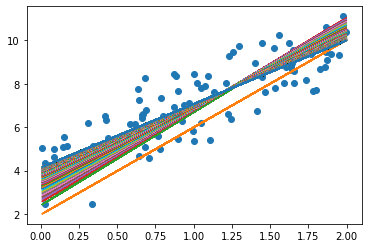

In [0]:
eta = 0.2 #learning rate
n_iterations = 1000 #some arbitrarily large number compared to our dataset 
m = 100

theta = np.random.randn(2,1)
fig, ax = plt.subplots()
ax.plot(X,y,'o')
for iter in range (n_iterations):
  grad = 2/m * X_b.T.dot(X_b.dot(theta)-y) #gradient of the error function for n dimensions
  theta = theta - eta*grad  #update theta by the slope of the error function
  y_4 = theta[0] + X*theta[1]
  ax.plot(X,y_4,'-')

#play around the eta to find the optimal learning rate that balances computation time (number of lines) and accuracy (final fit)

**Stochastic Gradient Descent**: Picks a random instance in the training step to compute the gradient on and steps based on that. It's able to run faster than BGD because SGD doesn't have to run through the whole set each time. However, since it is stochastic the parameters will bounce around never reaching a truely optimal value but just a value that is "good enough."

One way to get over this is to make a training schedule that sets a number of trials and gradually reduces the learning rate. 

SGD allows us to use only 50 trials instead of 1000 to converge on a good answer

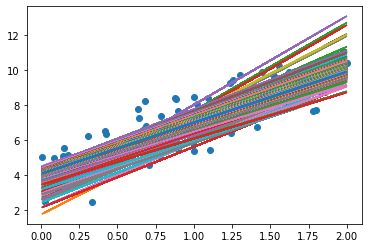

In [0]:
n_epochs = 50
t0, t1 = 5,50

def learning_schedule(t):
  return t0/(t + t1)

theta = np.random.randn(2,1)  #random init
fig, ax = plt.subplots()
ax.plot(X,y,'o')

for epoch in range(n_epochs):
  for i in range(m):
    random_i = np.random.randint(0,m)
    xi = X_b[random_i:random_i+1]
    yi = y[random_i:random_i+1]
    grad = 2*xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta-eta*grad
    y_5 = theta[0] + X*theta[1]
    ax.plot(X,y_5,'-')



**Mini-Batch Gradient Descent(mBGD)**: is the midpoint between batch and stochastic GD. It uses small sets of the training set, mini-batches, to compute the gradient. mBGD will still walk around the final value but not as much as SGD, and will converge faster than the BGD.

**Polynomial Regression**

When data is more complex than just a line, we can fit it with polynomials!

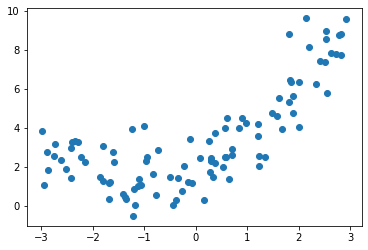

In [0]:
m = 100
X_p = 6*np.random.rand(m,1) - 3
y_p = 0.5*X_p**2 + X_p + 2 + np.random.randn(m,1)
fig, ax = plt.subplots()
ax.plot(X_p,y_p,'o')

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree = 2, include_bias = False) #We can choose the shape of the fit after looking at the data!

X_p2 = poly_f.fit_transform(X_p)  #the original feature and the square of the feature
print(X_p[0])
print(X_p2[0])

lin_reg = LinearRegression()
lin_reg.fit(X_p2,y_p)
bias,theta = lin_reg.intercept_, lin_reg.coef_


[0.6021471]
[0.6021471  0.36258113]


**Bias-Variance**

Bias: the part of the error due to the wrong assumptions. Usually a high bias is the sign of underfitting. 

Variance: the model's sensitivity to variation of parameters, mainly caused by high degrees of freedom. Usually a high variance is a sign of overfitting. 

Increasing complexity reduces bias and generally increases variance. 

Decreasing complexity reduces variance and increases bias. 

ergo. Bias-variance tradeoff

**Regularized Models**

Further constraining the weights of the model helps to reduce the number of polynomial degrees. 

**Ridge Regression**: Adds a minimization term to the cost function to ensure that the $\theta$ parameters are as small as possible. 

$J(\theta) = MSE(\theta) + \frac{\alpha}{2}\sum_1^n \theta_i^2$

Where $\alpha$ is another hyperparameter to control the amount of regularization (high = weights close to zero). When $\alpha=0$, Ridge regression becomes linear regression. 

The closed form solution of the Ridge Regression equation is: 

$\theta_{R} = (X^T X + \alpha A)^{-1} X^Ty$ where $A$ is the (n+1) Identity matrix with a 0 in the [0,0] index.

In [0]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
ridge_reg = Ridge(alpha =1, solver ="cholesky")
ridge_reg.fit(X_p, y_p)
print(ridge_reg.predict([[1.5]]))

sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X_p, y_p.ravel())
print(sgd_reg.predict([[1.5]]))

[[4.94162206]]
[4.9336409]


**Lasso Regression**: similar to ridge regression but it uses the l1 norm of the weight vector instead of half of the square of l2 (Ridge). 

$J(\theta) = MSE(\theta) + \alpha \sum_1^n |\theta_i|$

Lasso regression tends to set the weights of the less important features close to zero. 


In [0]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha =0.1) 
lasso_reg.fit(X_p, y_p)
print(lasso_reg.predict([[1.5]]))

sgd_reg = SGDRegressor(penalty = "l1")
sgd_reg.fit(X_p, y_p.ravel())
print(sgd_reg.predict([[1.5]]))

[4.89578509]
[4.91972975]


**Elastic Net** is a combination of Lasso and Ridge, with the hyperparameter r. 

$J(\theta) = MSE(\theta) + \alpha r \sum_1^n |\theta_i| + \alpha\frac{1-r}{2} \sum_1^n \theta_i^2$

Ridge regression is a good default. If there are some parameters that might be useless we might use Elastic net with a low r (l1_ratio).

In [0]:
from sklearn.linear_model import ElasticNet
en_reg = ElasticNet(alpha =0.1,l1_ratio=0.5) 
en_reg.fit(X_p, y_p)
print(en_reg.predict([[1.5]]))


[4.89534019]


**Logistic Regression**

Computes the weighted up of input features and feeds into the "sigmoid function" which outputs a number [0,1]

$\sigma(t) =  \frac{1}{1 + e^{-t}}$

The logistic estimation model:

$\hat{p} = h_\theta(x) = \sigma(x^T\theta)$

and the prediction is $\hat y = 0$ if $\hat{p} <0.5$ else $\hat y = 1$

Therefore, the Logistic Cost function is: 

$J(\theta) = -\frac{1}{m} \sum_1^m [y^{(i)}log(\hat p^{(i)}) + (1-y^{(i)})log(1-\hat p^{(i)})] $

And the partial derivative becomes: 

$\frac{\partial}{\partial \theta} J(\theta) \frac{1}{m} \sum_1^m (\sigma(\theta^Tx^{(i)}) - y^{(i)})x^{(i)}$

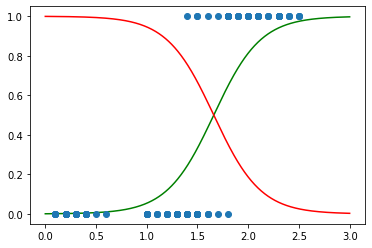

In [119]:
#training a model to recognize the flower from only the petal width

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X_iris = iris["data"][:,3:] #dataset column for petal width
y_iris = (iris["target"]==2).astype(np.int) # 2 is virginica in the dataset

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_iris,y_iris)

X_narrow = np.linspace(0,3,1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_narrow)

plt.plot(X_narrow,y_prob[:,1],"g-")
plt.plot(X_narrow,y_prob[:,0],"r-")
plt.plot(X_iris,y_iris,'o')

**Multinomial (Softmax) Regression**

Linear regression can be generalized further to classify more than just 2 classes. 

for a given class *k* we can compute the softmax score: 

$s_k(x) = x^T\theta^{(k)}$

And the probabilty for the given score is calculated: 

$\hat p_k =  \sigma(s(x))_k = \frac{e^{s_k(x)}}{\sum_1^K e^{s_j(x)}}$

Where: K is the total number of classes, s(x) is the vector containing all the scores for each class of x, and $\hat p$ is the probability of those scores

Predict the class with the highest score: 
$\hat y =$ argmax $\hat p_k = $ argmax $(\theta^{(k)})^Tx$

**Cross Entropy** is used to measure how well a set of probabilities matches the target class. The associated cost function can be used for softmax regression because it penalizes low probabilities for the target class. 

$J(\Theta) = -\frac{1}{m} \sum_1^m\sum_1^K y_klog(\hat p_k)$

When K = 2, this is the same as the logistic regression cost function

$\nabla_\theta J(\theta) = \frac{1}{m}\sum_1^m(\hat p_k - y_k)x$

In [125]:
X = iris["data"][:,(2,3)] #petal length and width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver ="lbfgs",C=10)
softmax_reg.fit(X,y)
softmax_reg.predict([[5,2]])
softmax_reg.predict_proba([[5,2]])

array([[-14.26490421,  -2.85609209,  -0.05921261]])